In [1]:
# import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.preprocessing import LabelEncoder, LabelBinarizer
import pylab
from pylab import rcParams
import scipy
import statsmodels.api as sm
from numpy.random import randn
import statistics
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format
pd.options.display.max_columns = None

def plot_histogram(c):
    churn_yes = df[df.Churn_Yes==1][c]
    churn_no = df[df.Churn_Yes==0][c]
    yes_mean = churn_yes.mean()
    no_mean = churn_no.mean(); 
    fig,ax = plt.subplots(figsize=(6,6))
    ax.hist([churn_yes,churn_no], bins=5, stacked=True)
    ax.legend(['Churn_Yes','Churn_No'])
    ymin, ymax = ax.get_ylim()
    xmin, xmax = ax.get_xlim()
    ax.axvline(yes_mean, color='blue', lw=2)
    ax.axvline(no_mean, color='orangered', lw=2)
    ax.text((xmax-xmin)/2,
            (ymax-ymin)/2,
            'Delta:\n' + str(round(abs(yes_mean - no_mean),2)),
            bbox={'facecolor':'white'})
    plt.title('Histogram with target overlay by ' + str(c))
    plt.xlabel(c); 
    plt.ylabel('# Churn')
    plt.show()

def plot_stacked(c):
    df.groupby([c,target]).size().unstack().plot(kind='bar', stacked=True)

df = pd.read_csv(r"/Users/mamba/Downloads/churn_clean/churn_clean.csv") 
target = 'Churn'

In [2]:
# understand information about the dataframe
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,5000.50000,49153.31960,38.75757,-90.78254,9756.56240,2.08770,53.07840,39806.92677,10.00185,12.01600,0.99420,0.39800,34.52619,172.62482,3392.34155,3.49080,3.50510,3.48700,3.49750,3.49290,3.49730,3.50950,3.49560
std,2886.89568,27532.19611,5.43739,15.15614,14432.69867,2.14720,20.69888,28199.91670,2.97602,3.02590,0.98847,0.63595,26.44306,42.94309,2185.29485,1.03780,1.03464,1.02798,1.02582,1.02482,1.03359,1.02850,1.02863
min,1.00000,601.00000,17.96612,-171.68815,0.00000,0.00000,18.00000,348.67000,0.09975,1.00000,0.00000,0.00000,1.00026,79.97886,155.50671,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
25%,2500.75000,26292.50000,35.34183,-97.08281,738.00000,0.00000,35.00000,19224.71750,8.01821,10.00000,0.00000,0.00000,7.91769,139.97924,1236.47083,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000,3.00000
50%,5000.50000,48869.50000,39.39580,-87.91880,2910.50000,1.00000,53.00000,33170.60500,10.01856,12.00000,1.00000,0.00000,35.43051,167.48470,3279.53690,3.00000,4.00000,3.00000,3.00000,3.00000,3.00000,4.00000,3.00000
75%,7500.25000,71866.50000,42.10691,-80.08875,13168.00000,3.00000,71.00000,53246.17000,11.96949,14.00000,2.00000,1.00000,61.47980,200.73472,5586.14137,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000,4.00000
max,10000.00000,99929.00000,70.64066,-65.66785,111850.00000,10.00000,89.00000,258900.70000,21.20723,23.00000,7.00000,6.00000,71.99928,290.16042,7158.98153,7.00000,7.00000,8.00000,7.00000,7.00000,8.00000,7.00000,8.00000


In [3]:
# rename any columns to assist with understanding
df.rename(columns= {
    'Item1': 'Timely Response',
    'Item2': 'Fixes',
    'Item3': 'Replacement',
    'Item4': 'Reliability',
    'Item5': 'Options',
    'Item6': 'Respectfulness',
    'Item7': 'Courteous',
    'Item8': 'Listening'},
    inplace=True)
df.info()
#df.describe()
#df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [4]:
# create a dataframe for the columns for further analysis
df_columns = df.columns
df_columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Timely Response', 'Fixes', 'Replacement',
       'Reliability', 'Options', 'Respectfulness', 'Courteous', 'Listening'],
      dtype='object')

In [5]:
# remove columns that will not contribute to the correlation analysis of the target variable
df = df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 
'State', 'County', 'Zip', 'Lat', 'Lng', 'Population', 'TimeZone', 'Job',
'Timely Response', 'Fixes', 'Replacement', 'Reliability',
'Options', 'Respectfulness', 'Courteous', 'Listening'])

df.shape

(10000, 29)

In [6]:
# explore missing data, nulls, and duplicates
null_values = df.isnull().sum()
print(null_values.info())

missing_values = df[df.columns[df.isna().any()]].columns
df_missing_values = df[missing_values]
print(df_missing_values.info())

df[df.duplicated()]
print(df.columns.duplicated().any())
print(df.duplicated().any())

<class 'pandas.core.series.Series'>
Index: 29 entries, Area to Bandwidth_GB_Year
Series name: None
Non-Null Count  Dtype
--------------  -----
29 non-null     int64
dtypes: int64(1)
memory usage: 464.0+ bytes
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Empty DataFrameNone
False
False


In [7]:
# exploring the variable types and their ranges
for a in df.loc[:, df.columns != target]:
    if df.dtypes[a] == "object":
        print('\n{}. is categorical: {}.'.format(a,df[a].unique()))
    else:
        print('\n{}. is numerical:'.format(a ))



Area. is categorical: ['Urban' 'Suburban' 'Rural'].

Children. is numerical:

Age. is numerical:

Income. is numerical:

Marital. is categorical: ['Widowed' 'Married' 'Separated' 'Never Married' 'Divorced'].

Gender. is categorical: ['Male' 'Female' 'Nonbinary'].

Outage_sec_perweek. is numerical:

Email. is numerical:

Contacts. is numerical:

Yearly_equip_failure. is numerical:

Techie. is categorical: ['No' 'Yes'].

Contract. is categorical: ['One year' 'Month-to-month' 'Two Year'].

Port_modem. is categorical: ['Yes' 'No'].

Tablet. is categorical: ['Yes' 'No'].

InternetService. is categorical: ['Fiber Optic' 'DSL' 'None'].

Phone. is categorical: ['Yes' 'No'].

Multiple. is categorical: ['No' 'Yes'].

OnlineSecurity. is categorical: ['Yes' 'No'].

OnlineBackup. is categorical: ['Yes' 'No'].

DeviceProtection. is categorical: ['No' 'Yes'].

TechSupport. is categorical: ['No' 'Yes'].

StreamingTV. is categorical: ['No' 'Yes'].

StreamingMovies. is categorical: ['Yes' 'No'].

Paper

In [8]:
# exploring Churn

for a in df.loc[:, df.columns == target]:
    if df.dtypes[a] == "object":
        print('\n{} is categorical: {}.'.format(a,df[a].unique()))
    else:
        print('\n{} is numerical:'.format(a ))
print(df.Churn.value_counts())


Churn is categorical: ['No' 'Yes'].
No     7350
Yes    2650
Name: Churn, dtype: int64


In [9]:
# Examining the variables, we see a few that have excessive categories. For example
# there are 4 ways to pay and there are 4 categories for marital status.

df['Marital']=np.where(df['Marital'] =='Widowed', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Separated', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Never Married', 'Not_Married',df['Marital'])
df['Marital']=np.where(df['Marital'] =='Divorced', 'Not_Married',df['Marital'])
print(df['Marital'].unique())

df['PaymentMethod']=np.where(df['PaymentMethod'] =='Credit Card (automatic)', 'Auto',df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Bank Transfer(automatic)', 'Auto',df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Mailed Check', 'Check',df['PaymentMethod'])
df['PaymentMethod']=np.where(df['PaymentMethod'] =='Electronic Check', 'Check',df['PaymentMethod'])
print(df['PaymentMethod'].unique())

plt.show()

['Not_Married' 'Married']
['Auto' 'Check']


In [10]:
# create a dataframe for numerical variables and categorical variables
num_vars = df.select_dtypes(include="number").columns
print(num_vars)
print(num_vars.shape)

cat_vars = df.select_dtypes(include="object").columns
print(cat_vars)
print(cat_vars.shape)

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')
(10,)
Index(['Area', 'Marital', 'Gender', 'Churn', 'Techie', 'Contract',
       'Port_modem', 'Tablet', 'InternetService', 'Phone', 'Multiple',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'],
      dtype='object')
(19,)


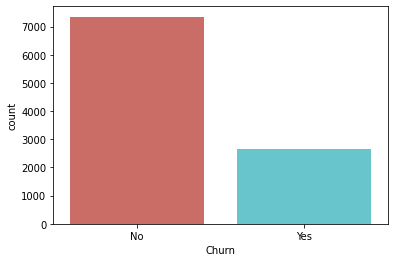

In [11]:
# we use sns countplot to display the distribution
# of the target variable.

sns.countplot(x=target, data=df, palette='hls')
plt.savefig('countplot_logreg.jpg')
plt.show()

In [12]:
# we can also groupby the numerical 
# target variables in a mean analysis 
# against the target variable, Churn.

df.groupby(target).mean().round(2).T

Churn,No,Yes
Children,2.09000,2.07000
Age,53.01000,53.27000
Income,39706.40000,40085.76000
Outage_sec_perweek,10.00000,10.00000
Email,11.99000,12.08000
Contacts,0.99000,1.01000
Yearly_equip_failure,0.40000,0.38000
Tenure,42.23000,13.15000
MonthlyCharge,163.01000,199.30000
Bandwidth_GB_Year,3971.86000,1785.01000


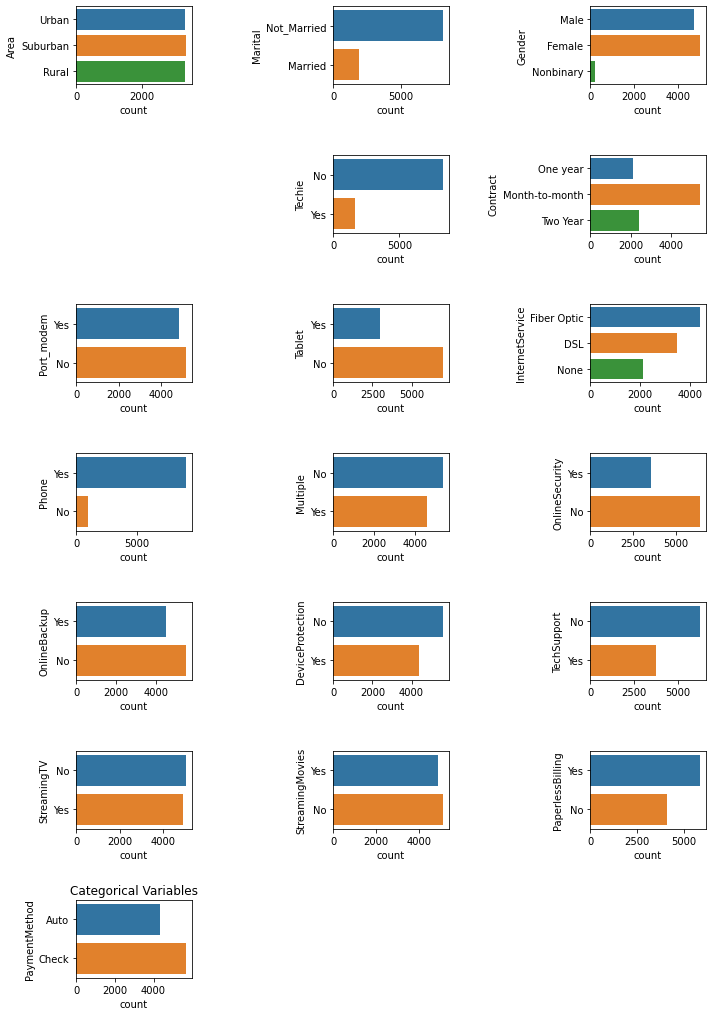

In [13]:
# to analyze the categorical data, we can plot a countplot 
# of each the variables.

fig = plt.figure(figsize=(10,20))
for d, col in enumerate(cat_vars):
    if col != target:
        plt.subplot(10, 3, d+1)
        ax = sns.countplot(y=col, data=df)
        fig.tight_layout(h_pad=4, w_pad=4)
plt.title('Categorical Variables')
plt.savefig('cat_vars_logreg.jpg')
plt.show()

In [14]:
for k in cat_vars:
    if k != target:
        print('\n\n=====================')
        print('\t{}'.format(k.upper()))
        print('============================')
        print(df.groupby(k).mean().round(2).T)




	AREA
Area                       Rural    Suburban       Urban
Children                 2.11000     2.08000     2.07000
Age                     52.71000    53.23000    53.30000
Income               39667.13000 39909.15000 39843.92000
Outage_sec_perweek       9.99000    10.03000     9.99000
Email                   12.05000    11.98000    12.02000
Contacts                 1.00000     0.99000     1.00000
Yearly_equip_failure     0.40000     0.40000     0.39000
Tenure                  35.14000    34.37000    34.07000
MonthlyCharge          172.49000   172.49000   172.90000
Bandwidth_GB_Year     3442.81000  3380.28000  3354.00000


	MARITAL
Marital                  Married  Not_Married
Children                 2.11000      2.08000
Age                     52.84000     53.13000
Income               40330.36000  39683.27000
Outage_sec_perweek      10.10000      9.98000
Email                   12.07000     12.00000
Contacts                 1.00000      0.99000
Yearly_equip_failure     0.40000

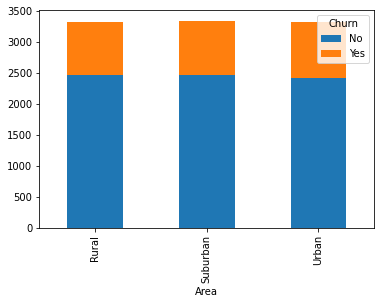

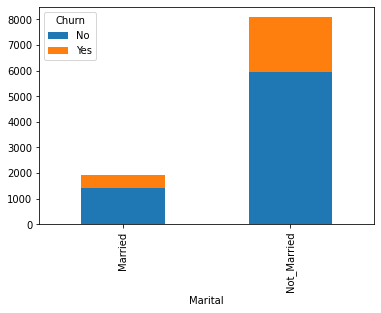

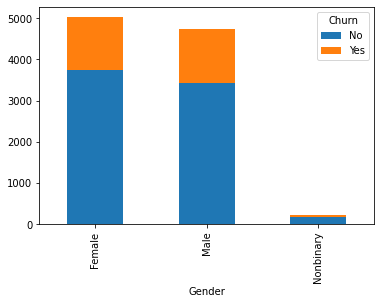

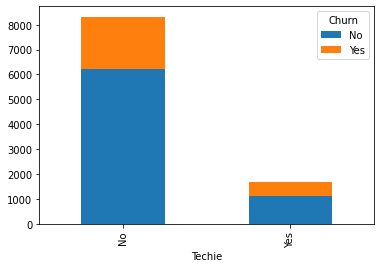

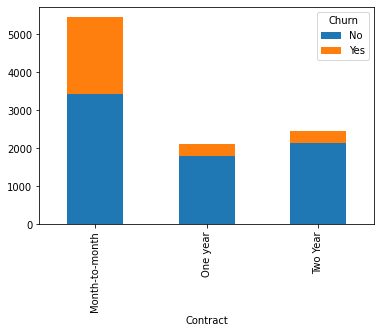

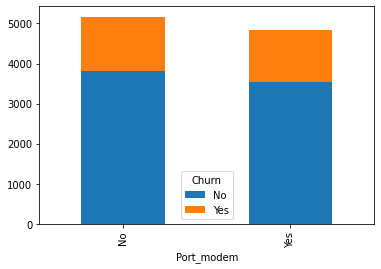

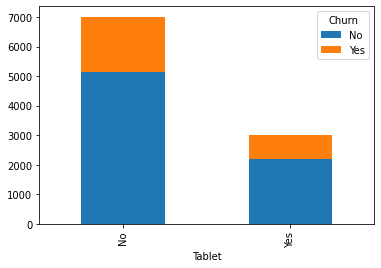

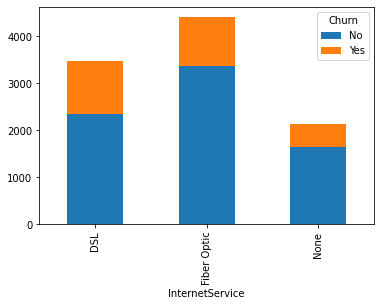

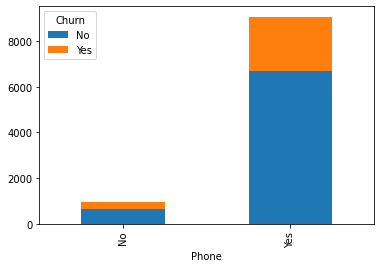

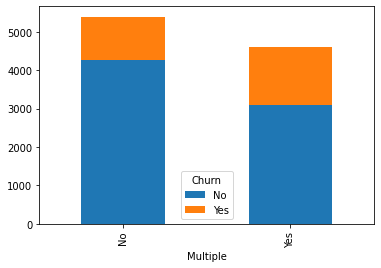

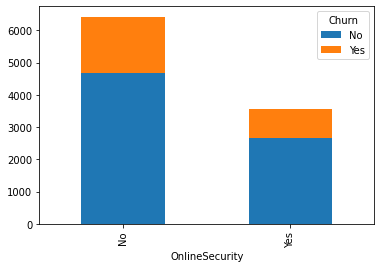

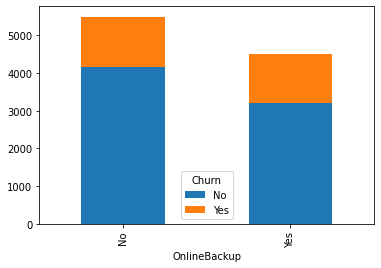

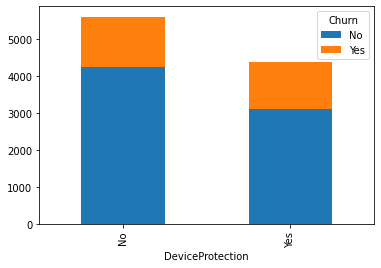

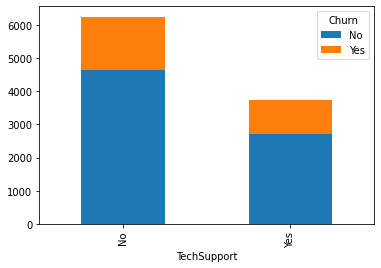

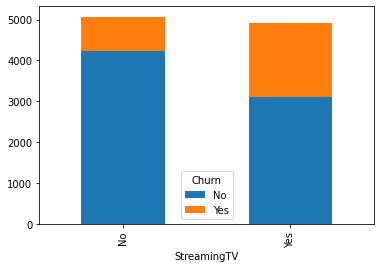

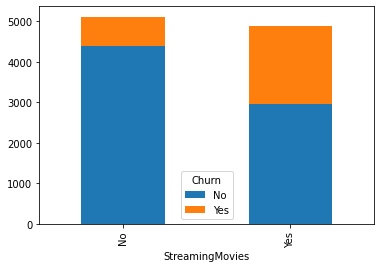

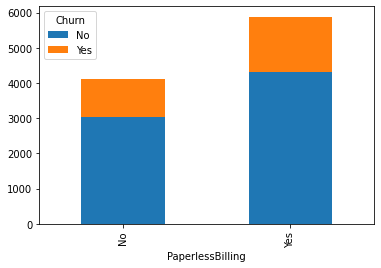

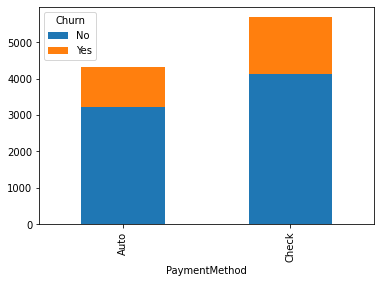

In [15]:
# variable vs target overlay
for k in cat_vars:
    if k != target:
        plot_stacked(k)

In [16]:
# converting categorical variables to numerical
for k in cat_vars:
    if k in df.columns:
        df = pd.get_dummies(df, columns=[k], drop_first=True)
        predictor_variables = (df.select_dtypes(include="uint8").columns.tolist())

In [17]:
df.describe()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Area_Suburban,Area_Urban,Marital_Not_Married,Gender_Male,Gender_Nonbinary,Churn_Yes,Techie_Yes,Contract_One year,Contract_Two Year,Port_modem_Yes,Tablet_Yes,InternetService_Fiber Optic,InternetService_None,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Check
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,2.08770,53.07840,39806.92677,10.00185,12.01600,0.99420,0.39800,34.52619,172.62482,3392.34155,0.33460,0.33270,0.80890,0.47440,0.02310,0.26500,0.16790,0.21020,0.24420,0.48340,0.29910,0.44080,0.21290,0.90670,0.46080,0.35760,0.45060,0.43860,0.37500,0.49290,0.48900,0.58820,0.56880
std,2.14720,20.69888,28199.91670,2.97602,3.02590,0.98847,0.63595,26.44306,42.94309,2185.29485,0.47187,0.47120,0.39319,0.49937,0.15023,0.44136,0.37380,0.40747,0.42963,0.49975,0.45789,0.49651,0.40938,0.29087,0.49849,0.47932,0.49758,0.49624,0.48415,0.49997,0.49990,0.49218,0.49527
min,0.00000,18.00000,348.67000,0.09975,1.00000,0.00000,0.00000,1.00026,79.97886,155.50671,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,35.00000,19224.71750,8.01821,10.00000,0.00000,0.00000,7.91769,139.97924,1236.47083,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,1.00000,53.00000,33170.60500,10.01856,12.00000,1.00000,0.00000,35.43051,167.48470,3279.53690,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
75%,3.00000,71.00000,53246.17000,11.96949,14.00000,2.00000,1.00000,61.47980,200.73472,5586.14137,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
max,10.00000,89.00000,258900.70000,21.20723,23.00000,7.00000,6.00000,71.99928,290.16042,7158.98153,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


In [18]:
print(predictor_variables)

['Area_Suburban', 'Area_Urban', 'Marital_Not_Married', 'Gender_Male', 'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Check']


In [19]:
target = 'Churn_Yes'

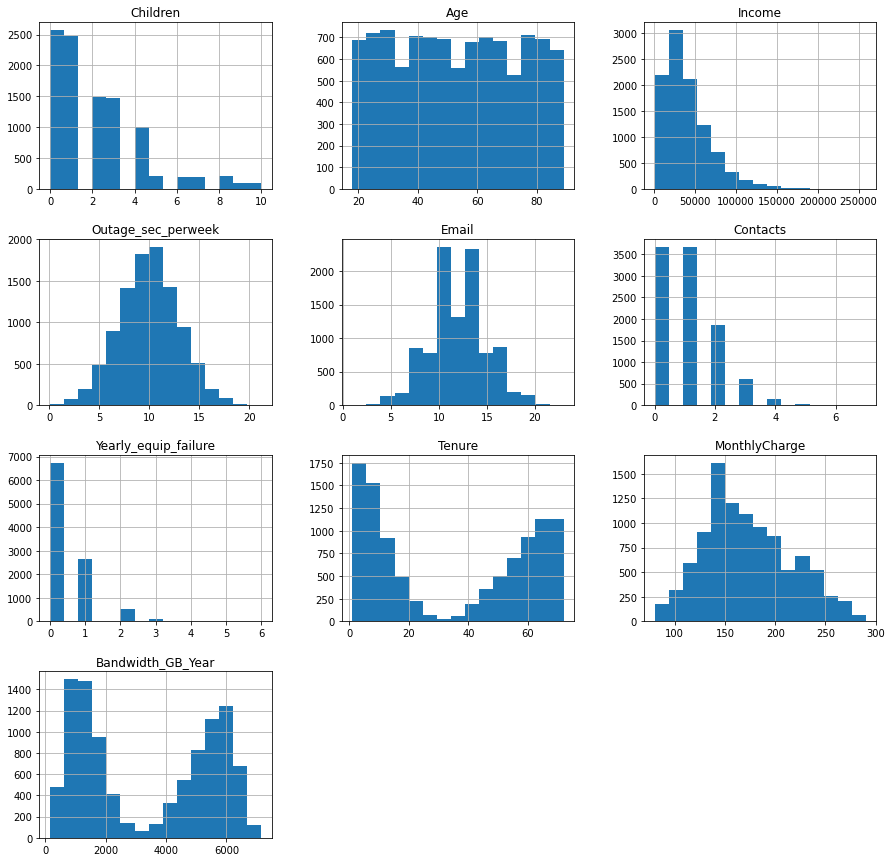

In [20]:
df[['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year']].hist(bins=15, figsize=(15,15))
fig.tight_layout(h_pad=5,w_pad=5)
plt.show()

In [21]:
print(df.columns)
df.shape
df.info(show_counts=True)
df.describe()

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year',
       'Area_Suburban', 'Area_Urban', 'Marital_Not_Married', 'Gender_Male',
       'Gender_Nonbinary', 'Churn_Yes', 'Techie_Yes', 'Contract_One year',
       'Contract_Two Year', 'Port_modem_Yes', 'Tablet_Yes',
       'InternetService_Fiber Optic', 'InternetService_None', 'Phone_Yes',
       'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Check'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Children                     10000 non-null  int64  
 1   Age                          10000 

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,Area_Suburban,Area_Urban,Marital_Not_Married,Gender_Male,Gender_Nonbinary,Churn_Yes,Techie_Yes,Contract_One year,Contract_Two Year,Port_modem_Yes,Tablet_Yes,InternetService_Fiber Optic,InternetService_None,Phone_Yes,Multiple_Yes,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,PaperlessBilling_Yes,PaymentMethod_Check
count,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000,10000.00000
mean,2.08770,53.07840,39806.92677,10.00185,12.01600,0.99420,0.39800,34.52619,172.62482,3392.34155,0.33460,0.33270,0.80890,0.47440,0.02310,0.26500,0.16790,0.21020,0.24420,0.48340,0.29910,0.44080,0.21290,0.90670,0.46080,0.35760,0.45060,0.43860,0.37500,0.49290,0.48900,0.58820,0.56880
std,2.14720,20.69888,28199.91670,2.97602,3.02590,0.98847,0.63595,26.44306,42.94309,2185.29485,0.47187,0.47120,0.39319,0.49937,0.15023,0.44136,0.37380,0.40747,0.42963,0.49975,0.45789,0.49651,0.40938,0.29087,0.49849,0.47932,0.49758,0.49624,0.48415,0.49997,0.49990,0.49218,0.49527
min,0.00000,18.00000,348.67000,0.09975,1.00000,0.00000,0.00000,1.00026,79.97886,155.50671,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
25%,0.00000,35.00000,19224.71750,8.01821,10.00000,0.00000,0.00000,7.91769,139.97924,1236.47083,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000
50%,1.00000,53.00000,33170.60500,10.01856,12.00000,1.00000,0.00000,35.43051,167.48470,3279.53690,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000,1.00000
75%,3.00000,71.00000,53246.17000,11.96949,14.00000,2.00000,1.00000,61.47980,200.73472,5586.14137,1.00000,1.00000,1.00000,1.00000,0.00000,1.00000,0.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
max,10.00000,89.00000,258900.70000,21.20723,23.00000,7.00000,6.00000,71.99928,290.16042,7158.98153,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000


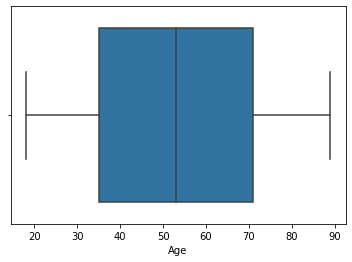

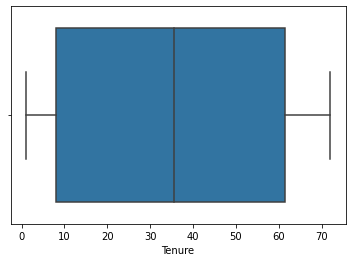

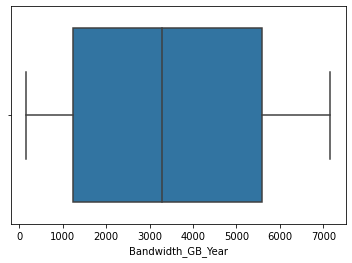

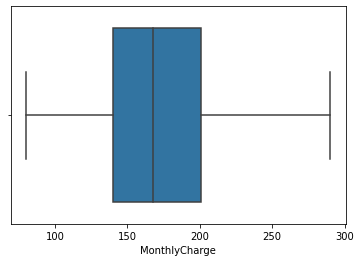

In [22]:
# seaborn boxplots are another tool for continuous variables
sns.boxplot('Age', data = df)
plt.show()
sns.boxplot('Tenure', data = df)
plt.show()
sns.boxplot('Bandwidth_GB_Year', data=df)
plt.show()
sns.boxplot('MonthlyCharge', data = df)
plt.show()

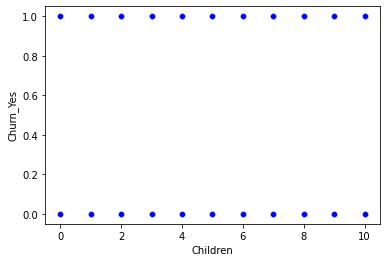

In [23]:
sns.scatterplot(x=df['Children'], y=df[target], color='blue')
plt.show()

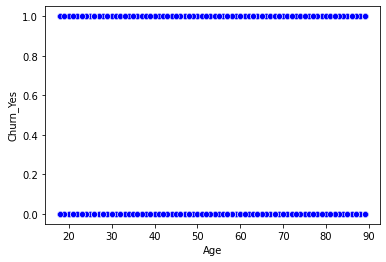

In [24]:
sns.scatterplot(x=df['Age'], y=df[target], color='blue')
plt.show()

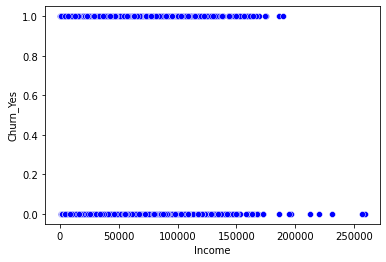

In [25]:
sns.scatterplot(x=df['Income'], y=df[target], color='blue')
plt.show()

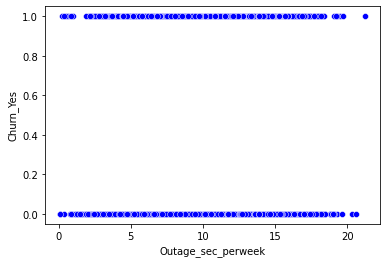

In [26]:
sns.scatterplot(x=df['Outage_sec_perweek'], y=df[target], 
color='blue')
plt.show()

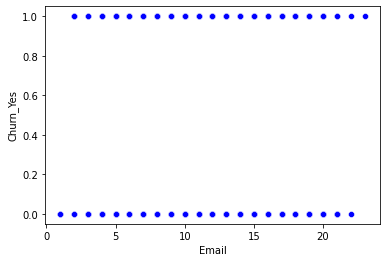

In [27]:
sns.scatterplot(x=df['Email'], y=df[target], color='blue')
plt.show()

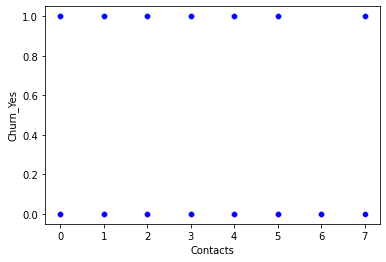

In [28]:
sns.scatterplot(x=df['Contacts'], y=df[target], color='blue')
plt.show()

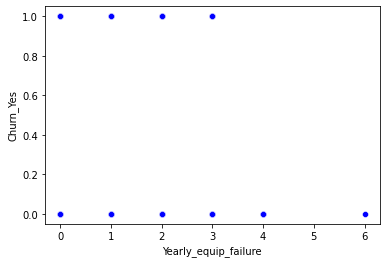

In [29]:
sns.scatterplot(x=df['Yearly_equip_failure'], 
y=df[target], color='blue')
plt.show()

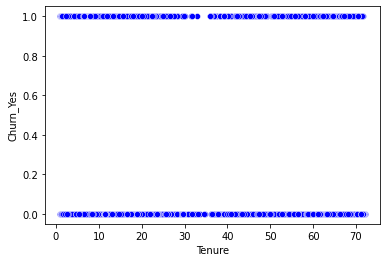

In [30]:
sns.scatterplot(x=df['Tenure'], y=df[target], color='blue')
plt.show()

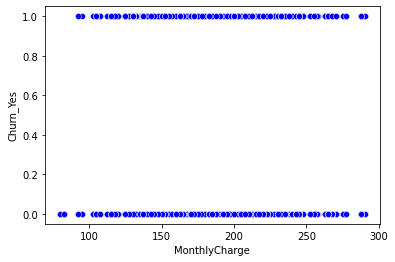

In [31]:
sns.scatterplot(x=df['MonthlyCharge'], 
y=df[target], color='blue')
plt.show()

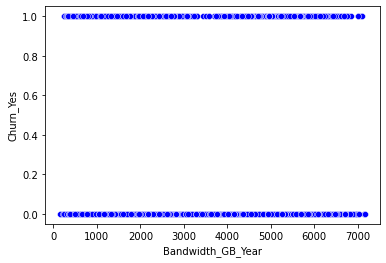

In [32]:
sns.scatterplot(x=df['Bandwidth_GB_Year'], 
y=df[target], color='blue')
plt.show()

In [33]:
print(df.head())
print(df.columns)

   Children  Age      Income  Outage_sec_perweek  Email  Contacts  \
0         0   68 28561.99000             7.97832     10         0   
1         1   27 21704.77000            11.69908     12         0   
2         4   50  9609.57000            10.75280      9         0   
3         1   48 18925.23000            14.91354     15         2   
4         0   83 40074.19000             8.14742     16         2   

   Yearly_equip_failure   Tenure  MonthlyCharge  Bandwidth_GB_Year  \
0                     1  6.79551      172.45552          904.53611   
1                     1  1.15668      242.63255          800.98277   
2                     1 15.75414      159.94758         2054.70696   
3                     0 17.08723      119.95684         2164.57941   
4                     1  1.67097      149.94832          271.49344   

   Area_Suburban  Area_Urban  Marital_Not_Married  Gender_Male  \
0              0           1                    1            1   
1              0           1    

<AxesSubplot:>

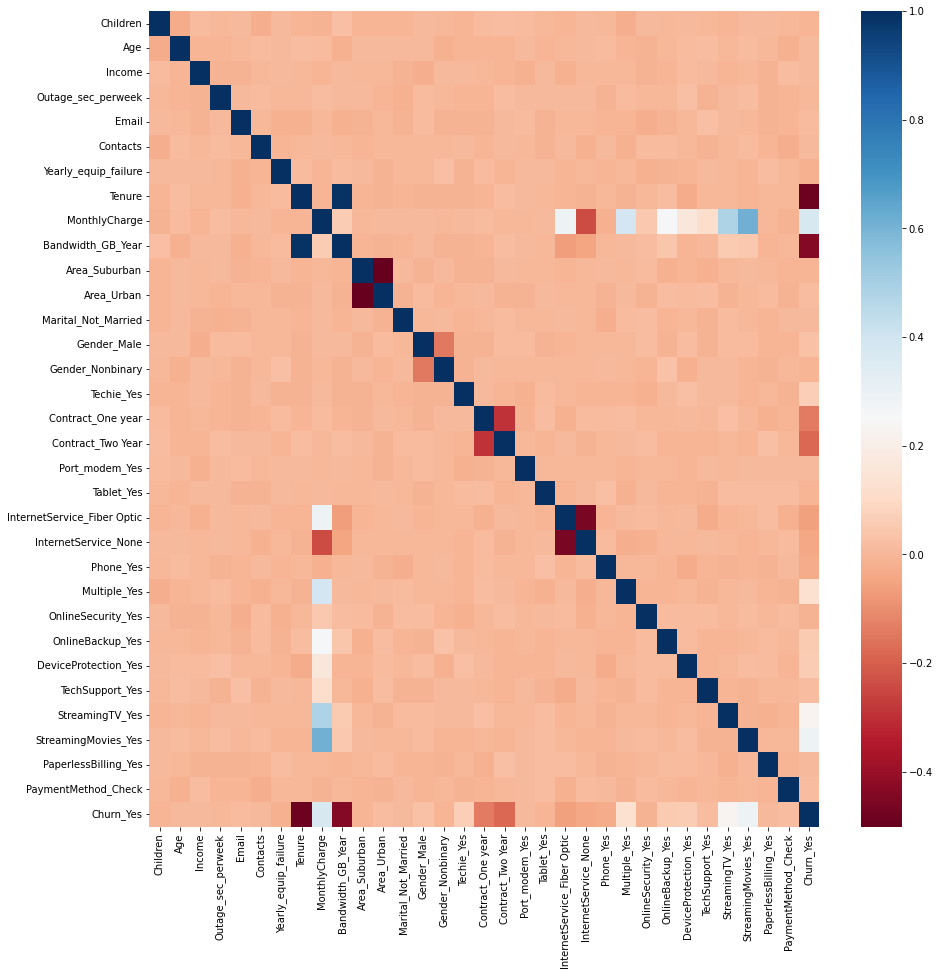

In [34]:
df=df[['Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Area_Suburban', 'Area_Urban',
       'Marital_Not_Married', 'Gender_Male', 'Gender_Nonbinary',
       'Techie_Yes', 'Contract_One year', 'Contract_Two Year',
       'Port_modem_Yes', 'Tablet_Yes', 'InternetService_Fiber Optic',
       'InternetService_None', 'Phone_Yes', 'Multiple_Yes',
       'OnlineSecurity_Yes', 'OnlineBackup_Yes', 'DeviceProtection_Yes',
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes',
       'PaperlessBilling_Yes', 'PaymentMethod_Check','Churn_Yes']]
correlation = df.corr()
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(correlation, xticklabels=correlation.columns, 
yticklabels = correlation.columns, cmap='RdBu')

In [35]:
# providing a copy of the prepared data set
df.to_csv('churn_prepared_step5_d208_pt2.csv')
prep_df = pd.read_csv('churn_prepared_step5_d208_pt2.csv')
prep_df['intercept']=1
prep_df = pd.get_dummies(prep_df, drop_first=True)
prep_df_col = prep_df.columns
print(prep_df_col)

Index(['Unnamed: 0', 'Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Area_Suburban', 'Area_Urban',
       'Marital_Not_Married', 'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes',
       'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes',
       'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None',
       'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Check',
       'Churn_Yes', 'intercept'],
      dtype='object')


In [36]:
prep_df = prep_df[['Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Area_Suburban', 'Area_Urban',
       'Marital_Not_Married', 'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes',
       'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes',
       'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None',
       'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Check',
       'Churn_Yes', 'intercept']]

In [37]:
# initial logit model with only the numerical predictor variables

logit_model_num = sm.Logit(prep_df['Churn_Yes'], 
prep_df[['Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'intercept']]).fit()
print(logit_model_num.summary())

Optimization terminated successfully.
         Current function value: 0.319801
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9989
Method:                           MLE   Df Model:                           10
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                  0.4469
Time:                        04:27:03   Log-Likelihood:                -3198.0
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Children                -0.0978      0.015     -6.311      0.000      -0.128      -0.067

In [38]:
# initial logit model with only the categorical predictor variables

logit_model_cat = sm.Logit(prep_df['Churn_Yes'], 
prep_df[['Area_Suburban', 'Area_Urban',
       'Marital_Not_Married', 'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes',
       'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes',
       'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None',
       'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Check',
       'intercept']]).fit()
print(logit_model_cat.summary())

Optimization terminated successfully.
         Current function value: 0.432807
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9977
Method:                           MLE   Df Model:                           22
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                  0.2515
Time:                        04:27:04   Log-Likelihood:                -4328.1
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Area_Suburban                  -0.0203      0.066     -0.309      0.758   

In [39]:
# initial logit model with all the predictor varialbes

logit_model_all = sm.Logit(prep_df['Churn_Yes'], 
prep_df[['Children', 'Age', 'Income', 'Outage_sec_perweek',
       'Email', 'Contacts', 'Yearly_equip_failure', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Area_Suburban', 'Area_Urban',
       'Marital_Not_Married', 'Gender_Male', 'Gender_Nonbinary', 'Techie_Yes',
       'Contract_One year', 'Contract_Two Year', 'Port_modem_Yes',
       'Tablet_Yes', 'InternetService_Fiber Optic', 'InternetService_None',
       'Phone_Yes', 'Multiple_Yes', 'OnlineSecurity_Yes', 'OnlineBackup_Yes',
       'DeviceProtection_Yes', 'TechSupport_Yes', 'StreamingTV_Yes',
       'StreamingMovies_Yes', 'PaperlessBilling_Yes', 'PaymentMethod_Check',
       'intercept']]).fit()
print(logit_model_all.summary())

Optimization terminated successfully.
         Current function value: 0.218342
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9967
Method:                           MLE   Df Model:                           32
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                  0.6224
Time:                        04:27:04   Log-Likelihood:                -2183.4
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Children                       -0.0054      0.137     -0.040      0.968   

In [40]:
# define the correlation between variables to see which ones have the most
# multicollinearity

def get_redundant_pairs(prep_df):
    pairs_drop = set()
    cols = prep_df.columns
    for i in range(0, prep_df.shape[1]):
        for j in range(0, i+1):
            pairs_drop.add((cols[i], cols[j]))
    return pairs_drop

def get_top_abs_correlations(prep_df, n=5):
    au_corr = prep_df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(prep_df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(prep_df, 10))


Top Absolute Correlations
Tenure                       Bandwidth_GB_Year      0.99150
MonthlyCharge                StreamingMovies_Yes    0.60811
Area_Suburban                Area_Urban             0.50071
Tenure                       Churn_Yes              0.48548
MonthlyCharge                StreamingTV_Yes        0.48231
InternetService_Fiber Optic  InternetService_None   0.46175
Bandwidth_GB_Year            Churn_Yes              0.44167
MonthlyCharge                Multiple_Yes           0.38598
                             Churn_Yes              0.37294
Contract_One year            Contract_Two Year      0.29324
dtype: float64


In [41]:
# reduced logit model

logit_model2 = sm.Logit(prep_df['Churn_Yes'], 
prep_df[['Tenure', 'MonthlyCharge', 'Techie_Yes','Contract_One year', 
       'Contract_Two Year', 'InternetService_Fiber Optic', 'Multiple_Yes', 
       'OnlineSecurity_Yes', 'OnlineBackup_Yes','DeviceProtection_Yes', 
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 
       'PaperlessBilling_Yes', 'intercept']]).fit()
print(logit_model2.summary())

Optimization terminated successfully.
         Current function value: 0.223650
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:              Churn_Yes   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9985
Method:                           MLE   Df Model:                           14
Date:                Mon, 25 Apr 2022   Pseudo R-squ.:                  0.6132
Time:                        04:27:04   Log-Likelihood:                -2236.5
converged:                       True   LL-Null:                       -5782.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Tenure                         -0.1143      0.003    -38.973      0.000   

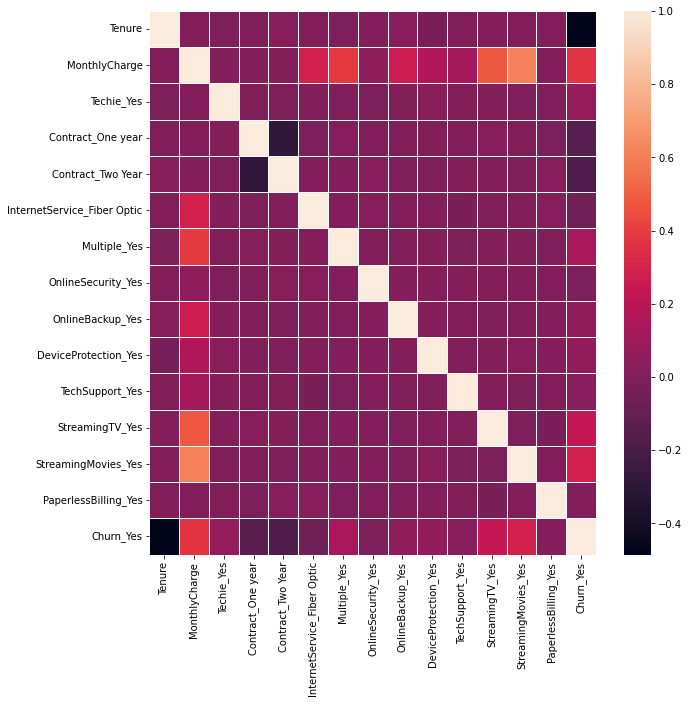

In [42]:
# seaborn heatmap can help explain the correlation
heatmap_churn = df[['Tenure', 'MonthlyCharge', 'Techie_Yes','Contract_One year', 
       'Contract_Two Year', 'InternetService_Fiber Optic', 'Multiple_Yes', 
       'OnlineSecurity_Yes', 'OnlineBackup_Yes','DeviceProtection_Yes', 
       'TechSupport_Yes', 'StreamingTV_Yes', 'StreamingMovies_Yes', 
       'PaperlessBilling_Yes', 'Churn_Yes']]
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(heatmap_churn.corr().iloc[:], annot=False, linewidths=.5, ax=ax)
plt.show()

In [43]:
# preparing for the confusion matrix, importing the data
# from the prepared dataset
conf_df = pd.read_csv('churn_prepared_step5_d208_pt2.csv')
X = conf_df.iloc[:, 1:-1].values
y = conf_df.iloc[:, -1].values

In [44]:
# for the confusion matrix, need to create a Training and Test
# data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
test_size = 0.2, random_state = 0)

In [45]:
# now we train the logistic regression on the training set
from sklearn.linear_model import  LogisticRegression
log_classify = LogisticRegression(random_state= 0)
log_classify.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [46]:
# since we have trained the regression, we can try
# to predict the Test results
y_pred = log_classify.predict(X_test)

In [47]:
# we can now make the confusion matrix using sklearn's
# confusion matrix protocol
from sklearn.metrics import confusion_matrix
confusion_visualization = confusion_matrix(y_test, y_pred)
print(confusion_visualization)

[[1335  151]
 [ 183  331]]


In [48]:
# check the accuracy using sklearn's cross val score
# which is a k-fold cross validation
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator=log_classify, X = X_train, 
y = y_train, cv= 10)
print('Accuracy: {:.2f}%'.format(accuracy.mean()*100))
print('Standard Deviation: {:.2f}%'.format(accuracy.std()*100))

Accuracy: 82.96%
Standard Deviation: 0.85%


<AxesSubplot:>

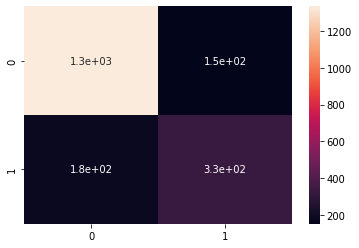

In [49]:
y_pred_test = log_classify.predict(X_test)
confusion_visualization2 = confusion_matrix(y_test, y_pred_test)
sns.heatmap(confusion_visualization2, annot=True)

In [50]:
# this is a classification report from sklearn
from sklearn.metrics import classification_report
print (classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1486
           1       0.69      0.64      0.66       514

    accuracy                           0.83      2000
   macro avg       0.78      0.77      0.78      2000
weighted avg       0.83      0.83      0.83      2000



In [51]:
# there are still variables with high p-values and high correlations
# we can run another correlation test to see which variables are 
# multicollinear

def get_redundant_pairs(heatmap_churn):
    pairs_drop = set()
    cols = heatmap_churn.columns
    for i in range(0, heatmap_churn.shape[1]):
        for j in range(0, i+1):
            pairs_drop.add((cols[i], cols[j]))
    return pairs_drop

def get_top_abs_correlations(heatmap_churn, n=5):
    au_corr = heatmap_churn.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(heatmap_churn)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(heatmap_churn, 10))


Top Absolute Correlations
MonthlyCharge        StreamingMovies_Yes           0.60811
Tenure               Churn_Yes                     0.48548
MonthlyCharge        StreamingTV_Yes               0.48231
                     Multiple_Yes                  0.38598
                     Churn_Yes                     0.37294
Contract_One year    Contract_Two Year             0.29324
StreamingMovies_Yes  Churn_Yes                     0.28926
MonthlyCharge        InternetService_Fiber Optic   0.28660
                     OnlineBackup_Yes              0.25944
StreamingTV_Yes      Churn_Yes                     0.23015
dtype: float64


In [52]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

/usr/local/bin/python3
3.10.4 (v3.10.4:9d38120e33, Mar 23 2022, 17:29:05) [Clang 13.0.0 (clang-1300.0.29.30)]
sys.version_info(major=3, minor=10, micro=4, releaselevel='final', serial=0)
